In [42]:
import numpy as np
import polars as pl
import polars.selectors as cs
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import great_tables as tg
import altair as alt

In [43]:
df_path = r'../DATASETS/Social_Network_Ads.csv'

In [44]:
df = pl.read_csv(df_path)

In [45]:
df

Age,EstimatedSalary,Purchased
i64,i64,i64
19,19000,0
35,20000,0
26,43000,0
27,57000,0
19,76000,0
…,…,…
46,41000,1
51,23000,1
50,20000,1


In [46]:
X = df.select(cs.exclude('Purchased'))

In [47]:
y = df['Purchased']

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
scaler = StandardScaler()

In [52]:
scaled_X_train = scaler.fit_transform(X_train)

In [53]:
scaled_X_test = scaler.transform(X_test)

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
random_forest = RandomForestClassifier(n_jobs=-1, random_state=42, n_estimators=100, criterion='entropy')

In [56]:
random_forest.fit(scaled_X_train, y_train)

RandomForestClassifier(criterion='entropy', n_jobs=-1, random_state=42)

In [57]:
predictions = random_forest.predict(scaled_X_test)

In [58]:
pl.DataFrame({
    'Actual': y_test,
    'Predicted': predictions,
    'Error': pl.Series(y_test) != pl.Series(predictions),
})

Actual,Predicted,Error
i64,i64,bool
0,1,true
1,1,false
0,0,false
1,1,false
0,0,false
…,…,…
0,0,false
1,1,false
0,0,false


In [59]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

In [60]:
accuracy_score(y_test, predictions)

0.9

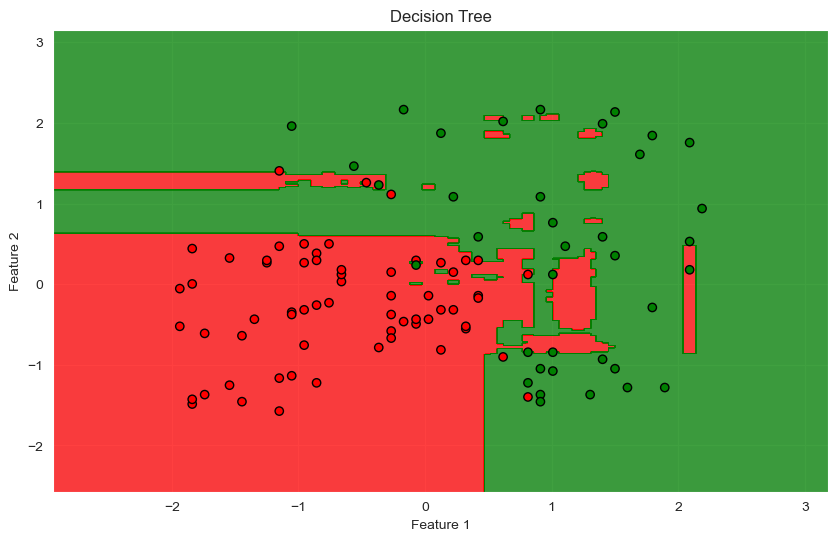

In [62]:
from matplotlib.colors import ListedColormap

X_set, y_set = scaled_X_test[:, :2], y_test.to_numpy()
X1, X2 = np.meshgrid(
    np.arange(X_set[:, 0].min() - 1, X_set[:, 0].max() + 1, 0.01),
    np.arange(X_set[:, 1].min() - 1, X_set[:, 1].max() + 1, 0.01)
)
plt.figure(figsize=(10, 6))
plt.contourf(X1, X2, random_forest.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.scatter(X_set[:, 0], X_set[:, 1], c=y_set, cmap=ListedColormap(('red', 'green')), edgecolors='k')
plt.title('Decision Tree')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()